# Regression

## Single Feature

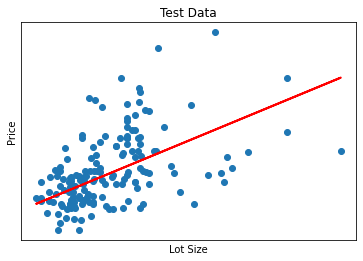

X=[5000], Predicted=[66266.01524043]


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load CSV and columns
df = pd.read_csv("Housing.csv")

X = df['lotsize']
X = X.values.reshape(len(X), 1)

y = df['price']
y = y.values.reshape(len(y), 1)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Plot outputs
plt.scatter(X_test, y_test)
plt.title("Test Data")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.xticks(())
plt.yticks(())

# Create linear regression
regr = linear_model.LinearRegression()

# Train the model using the training data set
regr.fit(X_train, y_train)

# Plot regression outputs
plt.plot(X_test, regr.predict(X_test), color='r', linewidth=2)

# Show graph
plt.show()

# Single prediction
Xnew = [[5000]]
ynew = regr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

## Taking only the selected features

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load CSV and columns
df = pd.read_csv("Housing.csv")

X = df[['lotsize', 'bedrooms', 'bathrms']]
X = X.values.reshape(len(X), 3)

y = df['price']
y = y.values.reshape(len(y), 1)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create linear regression
regr = linear_model.LinearRegression()

# Train the model using the training data set
regr.fit(X_train, y_train)

# Single prediction
Xnew = [[5000, 2, 1]]
ynew = regr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5000, 2, 1], Predicted=[55563.76884531]


## Multiple Features

In [3]:
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load CSV and columns
dataset = pd.read_csv("Housing.csv")
data = dataset.iloc[:, :]
data.replace(('yes', 'no'), (1, 0), inplace=True)

X = data.iloc[:, 2:].values 
y = dataset.iloc[:, 1].values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create linear regression
regr = linear_model.LinearRegression()

# Train the model using the training data set
regr.fit(X_train, y_train)

# prediction
Xnew = [[5000, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0]]
ynew = regr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5000, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0], Predicted=54779.0361318098


## Make random regression model

In [4]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=4, noise=0.1, random_state=1)

# fit final model
model = LinearRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=4, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175  1.62434536 -0.61175641], Predicted=-25.599427097167258
X=[-2.06014071  1.46210794  0.3190391  -0.24937038], Predicted=39.17353369167847
X=[-0.7612069   1.74481176  0.86540763 -2.3015387 ], Predicted=-98.17348039596953


## Plot for residual error 

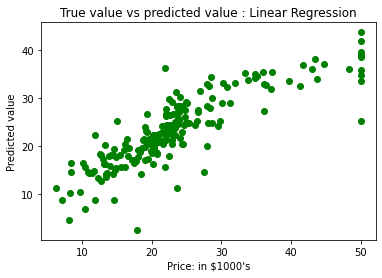

Mean Square Error :  25.20577470236647
Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266178


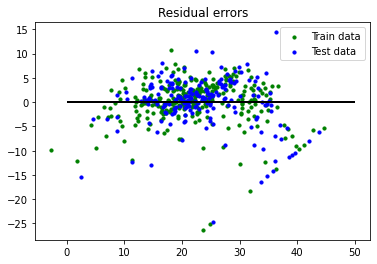

In [5]:
# https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/

# Importing Libraries 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics
  
# load the boston dataset 
boston = datasets.load_boston(return_X_y=False) 
  
# defining feature matrix(X) and response vector(y) 
X = boston.data 
y = boston.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

# predicting the test set results 
y_pred = reg.predict(X_test) 

# Plotting Scatter graph to show the prediction  
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

# Results of Linear Regression. 
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
# plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()

## Polynomial Regression for Non-Linear Data – ML

Linear model:
Slope of the line is [[14.58132936]]
Intercept value is [55.49424763]


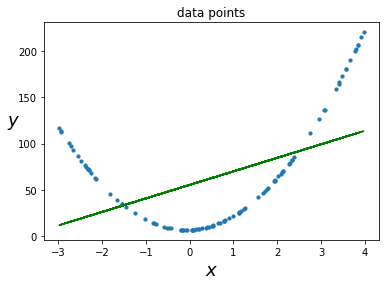

MSE of Linear model 2716.50147037545
R2 score of Linear model:  0.2366025733502971

Polynomial model:
Coefficients of x are [[ 2. 13.]]
Intercept is [7.]


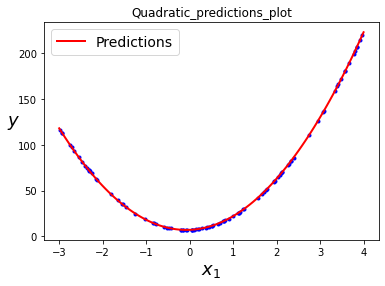

MSE of Polyregression model 3.7383329437518527e-28
R2 score of Linear model:  1.0


In [6]:
# Ref: https://www.geeksforgeeks.org/polynomial-regression-for-non-linear-data-ml/?ref=rp

# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score 

# Importing the dataset 
## x = data, y = quadratic equation 
x = np.array(7 * np.random.rand(100, 1) - 3) 
x1 = x.reshape(-1, 1) 
y = 13 * x*x + 2 * x + 7

# First try to fit the data with a linear model.
# Model initialization 
regression_model = LinearRegression() 
# Fit the data(train the model) 
regression_model.fit(x1, y) 
print('Linear model:')
print('Slope of the line is', regression_model.coef_) 
print('Intercept value is', regression_model.intercept_) 
# Predict 
y_predicted = regression_model.predict(x1) 

# data points 
plt.scatter(x, y, s = 10) 
plt.xlabel("$x$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.title("data points") 

# predicted values 
plt.plot(x, y_predicted, color ='g')
plt.show()

# model evaluation 
# Calculate the performance of the model in terms of mean square error, root mean square error and r2 score.
mse = mean_squared_error(y, y_predicted) 
rmse = np.sqrt(mean_squared_error(y, y_predicted)) 
r2 = r2_score(y, y_predicted) 

# printing values 
print('MSE of Linear model', mse) 
print('R2 score of Linear model: ', r2) 


# Try Polynomial Regression with degree 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_features.fit_transform(x1) 

lin_reg = LinearRegression() 
lin_reg.fit(x_poly, y)
print()
print('Polynomial model:')
print('Coefficients of x are', lin_reg.coef_) 
print('Intercept is', lin_reg.intercept_) 

# Plot the quadratic equation obtained
x_new = np.linspace(-3, 4, 100).reshape(100, 1) 
x_new_poly = poly_features.transform(x_new) 
y_new = lin_reg.predict(x_new_poly) 
plt.plot(x, y, "b.") 
plt.plot(x_new, y_new, "r-", linewidth = 2, label ="Predictions") 
plt.xlabel("$x_1$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.legend(loc ="upper left", fontsize = 14) 

plt.title("Quadratic_predictions_plot") 
plt.show() 

# Calculate the performance of the model obtained by Polynomial Regression
y_deg2 = lin_reg.predict(x_poly) 
# model evaluation 
mse_deg2 = mean_squared_error(y, y_deg2) 
r2_deg2 = r2_score(y, y_deg2) 

# printing values 
print('MSE of Polyregression model', mse_deg2) 
print('R2 score of Linear model: ', r2_deg2) 

## Implementation of Polynomial Regression

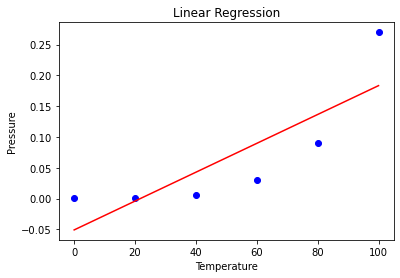

X=[70.0], Predicted=0.11307333333333336


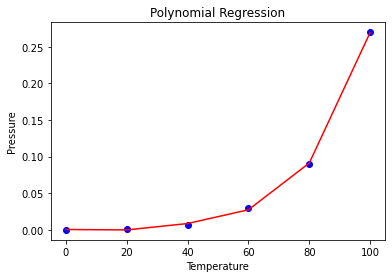

X=[70.0], Predicted=0.05017265624932479


In [7]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
datas = pd.read_csv('data.csv') 

X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values 

# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
lin.fit(X, y) 

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show()

# Predicting a new result with Linear Regression 
Xnew = [[70.0]]
ynew = lin.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
# poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin2.predict(X_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show()

# Predicting a new result with Polynomial Regression 
Xnew = [[70.0]]
ynew = lin2.predict(poly.fit_transform(Xnew))
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))